In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#deklaracja parametrów
N=300
L=100/0.05292
dx=L/N
h=1
prog=0.0000001/27211.6
m=0.067
a=0.95*m*dx*dx/(h*h)
W=0/27211.6
V=np.zeros(N+1)
V[int(N/2)]=-W
psi=np.zeros(N+1)
psi_prim=np.zeros(N+1)
for i in range(1, N):
    psi[i]=np.random.uniform(-1, 1)
E_nowe=0
E_stare=0
E_tab=[]

In [42]:
#pierwsze wywołanie
for i in range(1, N):
    psi_prim[i]=psi[i]+a*h*h/(2*m)*(psi[i+1]+psi[i-1]-2*psi[i])/(dx*dx)-a*V[i]*psi[i]
for i in range(1, N):
    psi[i]=psi_prim[i]
C=0
for i in range(0, N+1):
    C=C+dx*psi[i]*psi[i]
psi_norm = [x * (1/np.sqrt(C)) for x in psi]
psi=psi_norm
E=0
for i in range(1, N):
    E=E+dx*psi[i]*(-h*h/(2*m)*(psi[i+1]+psi[i-1]-2*psi[i])/(dx*dx)+V[i]*psi[i])
E_stare=E
E_tab.append(E)

In [43]:
#drugie wywołanie
for i in range(1, N):
    psi_prim[i]=psi[i]+a*h*h/(2*m)*(psi[i+1]+psi[i-1]-2*psi[i])/(dx*dx)-a*V[i]*psi[i]
for i in range(1, N):
    psi[i]=psi_prim[i]
C=0
for i in range(0, N+1):
    C=C+dx*psi[i]*psi[i]
psi_norm = [x * (1/np.sqrt(C)) for x in psi]
psi=psi_norm
E=0
for i in range(1, N):
    E=E+dx*psi[i]*(-h*h/(2*m)*(psi[i+1]+psi[i-1]-2*psi[i])/(dx*dx)+V[i]*psi[i])
E_nowe=E
E_tab.append(E)

In [44]:
#wywołanie w pętli
while abs(E_stare-E_nowe)>prog:
    for i in range(1, N):
        psi_prim[i]=psi[i]+a*h*h/(2*m)*(psi[i+1]+psi[i-1]-2*psi[i])/(dx*dx)-a*V[i]*psi[i]
    for i in range(1, N):
        psi[i]=psi_prim[i]
    C=0
    for i in range(0, N+1):
        C=C+dx*psi[i]*psi[i]
    psi_norm = [x * (1/np.sqrt(C)) for x in psi]
    psi=psi_norm
    E=0
    for i in range(1, N):
        E=E+dx*psi[i]*(-h*h/(2*m)*(psi[i+1]+psi[i-1]-2*psi[i])/(dx*dx)+V[i]*psi[i])
    E_stare=E_nowe
    E_nowe=E
    E_tab.append(E)

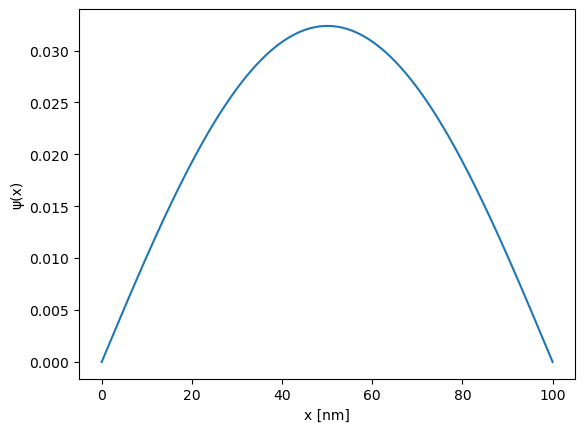

In [45]:
x = np.linspace(0, 100, N+1)
plt.plot(x, psi)
plt.xlabel('x [nm]')
plt.ylabel('ψ(x)')
plt.show()

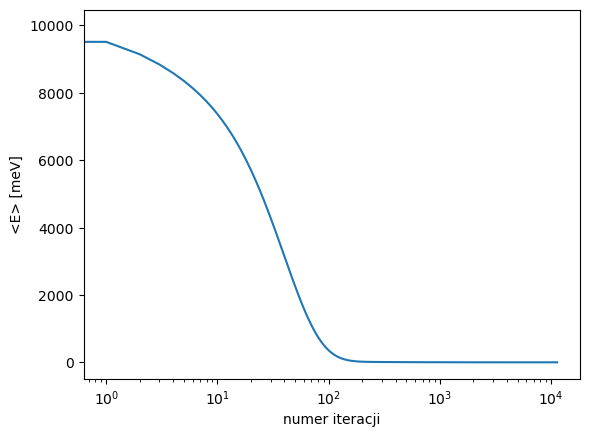

0.5614025029634155


In [46]:
E_norm = [x * 27211.6 for x in E_tab]
plt.semilogx(E_norm)
plt.xlabel('numer iteracji')
plt.ylabel('<E> [meV]')
plt.show()
print(E_norm[-1])

In [34]:
# Pierwszy stan wzbudzony
psi2=np.zeros(N+1)
psi2_prim=np.zeros(N+1)
for i in range(1, N):
    psi2[i]=np.random.uniform(-1, 1)
E_nowe=0
E_stare=0
E2_tab=[]

In [35]:
#pierwsze wywołanie
for i in range(1, N):
    psi2_prim[i]=psi2[i]+a*h*h/(2*m)*(psi2[i+1]+psi2[i-1]-2*psi2[i])/(dx*dx)-a*V[i]*psi2[i]
for i in range(1, N):
    psi2[i]=psi2_prim[i]
rzut=0
for i in range(0, N+1):
    rzut=rzut+dx*psi[i]*psi2[i]
for i in range(0, N+1):
    psi2[i]=psi2[i]-rzut*psi[i]
C=0
for i in range(0, N+1):
    C=C+dx*psi2[i]*psi2[i]
psi2_norm = [x * (1/np.sqrt(C)) for x in psi2]
psi2=psi2_norm
E=0
for i in range(1, N):
    E=E+dx*psi2[i]*(-h*h/(2*m)*(psi2[i+1]+psi2[i-1]-2*psi2[i])/(dx*dx)+V[i]*psi2[i])
E_stare=E
E2_tab.append(E)

In [36]:
#drugie wywołanie
for i in range(1, N):
    psi2_prim[i]=psi2[i]+a*h*h/(2*m)*(psi2[i+1]+psi2[i-1]-2*psi2[i])/(dx*dx)-a*V[i]*psi2[i]
for i in range(1, N):
    psi2[i]=psi2_prim[i]
rzut=0
for i in range(0, N+1):
    rzut=rzut+dx*psi[i]*psi2[i]
for i in range(0, N+1):
    psi2[i]=psi2[i]-rzut*psi[i]
C=0
for i in range(0, N+1):
    C=C+dx*psi2[i]*psi2[i]
psi2_norm = [x * (1/np.sqrt(C)) for x in psi2]
psi2=psi2_norm
E=0
for i in range(1, N):
    E=E+dx*psi2[i]*(-h*h/(2*m)*(psi2[i+1]+psi2[i-1]-2*psi2[i])/(dx*dx)+V[i]*psi2[i])
E_nowe=E
E2_tab.append(E)

In [37]:
#wywołanie w pętli
while abs(E_stare-E_nowe)>prog:
    for i in range(1, N):
        psi2_prim[i]=psi2[i]+a*h*h/(2*m)*(psi2[i+1]+psi2[i-1]-2*psi2[i])/(dx*dx)-a*V[i]*psi2[i]
    for i in range(1, N):
        psi2[i]=psi2_prim[i]
    rzut=0
    for i in range(0, N+1):
        rzut=rzut+dx*psi[i]*psi2[i]
    for i in range(0, N+1):
        psi2[i]=psi2[i]-rzut*psi[i]
    C=0
    for i in range(0, N+1):
        C=C+dx*psi2[i]*psi2[i]
    psi2_norm = [x * (1/np.sqrt(C)) for x in psi2]
    psi2=psi2_norm
    E=0
    for i in range(1, N):
        E=E+dx*psi2[i]*(-h*h/(2*m)*(psi2[i+1]+psi2[i-1]-2*psi2[i])/(dx*dx)+V[i]*psi2[i])
    E_stare=E_nowe
    E_nowe=E
    E2_tab.append(E)

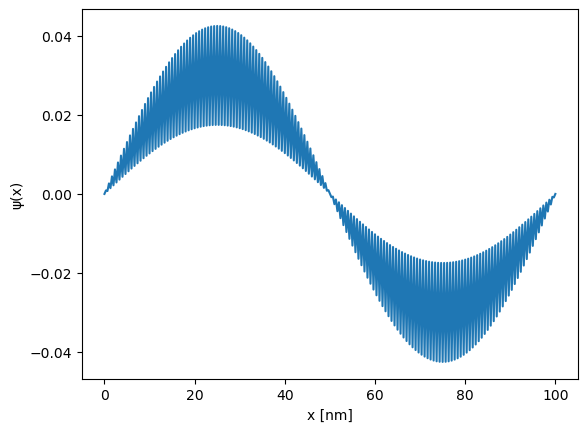

In [38]:
x = np.linspace(0, 100, N+1)
plt.plot(x, psi2)
plt.xlabel('x [nm]')
plt.ylabel('ψ(x)')
plt.show()

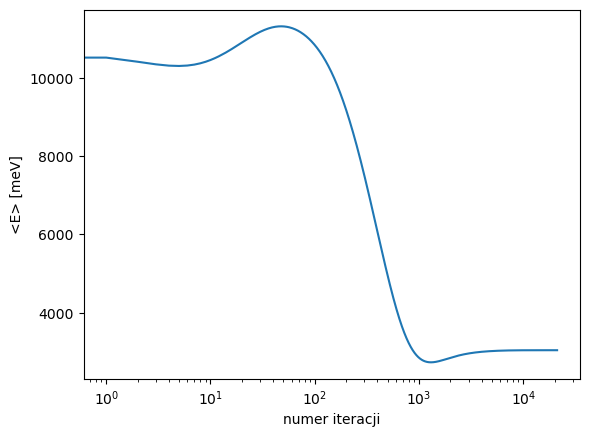

3040.6366978975484


In [39]:
E2_norm = [x * 27211.6 for x in E2_tab]
plt.semilogx(E2_norm)
plt.xlabel('numer iteracji')
plt.ylabel('<E> [meV]')
plt.show()
print(E2_norm[-1])